In [1]:
# Here we define what Is the Relationship between Housing Characteristics and Complaints?

# The goal of this project is to find the answer to the Question -
# Does the Complaint Type that we identified (HEAT/HOT WATER) have an obvious relationship with any particular characteristic 
# or characteristic of the Houses?


import types
import pandas as pd
from botocore.client import Config
import ibm_boto3


# Upload our dataset

df_data_2 = pd.read_csv(body)
df_data_2.head()



,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2019-06-13T18:47:05.000,43096054,DOOR/WINDOW,11225.0,501 NEW YORK AVENUE,NEW YORK AVENUE,ADDRESS,BROOKLYN,The Department of Housing Preservation and Dev...,BROOKLYN,40.662897,-73.947941,2019-06-25T11:15:05.000,RESIDENTIAL BUILDING,Closed
1,2019-06-25T09:50:51.000,43095936,PAINT/PLASTER,10034.0,639 WEST 207 STREET,WEST 207 STREET,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.868598,-73.921780,NaN,RESIDENTIAL BUILDING,Open
2,2019-05-23T16:59:36.000,43096069,PAINT/PLASTER,10009.0,542 EAST 11 STREET,EAST 11 STREET,ADDRESS,NEW YORK,The Department of Housing Preservation and Dev...,MANHATTAN,40.728000,-73.980751,2019-06-25T11:25:15.000,RESIDENTIAL BUILDING,Closed
3,2019-06-11T12:18:03.000,43096048,SAFETY,10040.0,40 ARDEN STREET,ARDEN STREET,ADDRESS,NEW YORK,The Department of Housing Preservation and Dev...,MANHATTAN,40.862066,-73.927229,2019-06-25T12:58:43.000,RESIDENTIAL BUILDING,Closed
4,2019-06-25T22:12:53.000,43096125,GENERAL,11211.0,566 LORIMER STREET,LORIMER STREET,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.713860,-73.949326,NaN,RESIDENTIAL BUILDING,Open


In [3]:
df_data_2.to_pickle('./df_raw2.pkl')

In [4]:
client_cred.upload_file('./df_raw2.pkl',bucket,'df_raw_cos.pkl')

In [5]:
client_cred.download_file(Bucket=bucket,Key='df_raw_cos.pkl',Filename='./df_raw_local.pkl')

In [6]:
df1 = pd.read_pickle('./df_raw_local.pkl')

In [7]:
# let's examine our dataset with first 5 complaints
df1.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2019-06-13T18:47:05.000,43096054,DOOR/WINDOW,11225.0,501 NEW YORK AVENUE,NEW YORK AVENUE,ADDRESS,BROOKLYN,The Department of Housing Preservation and Dev...,BROOKLYN,40.662897,-73.947941,2019-06-25T11:15:05.000,RESIDENTIAL BUILDING,Closed
1,2019-06-25T09:50:51.000,43095936,PAINT/PLASTER,10034.0,639 WEST 207 STREET,WEST 207 STREET,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.868598,-73.921780,NaN,RESIDENTIAL BUILDING,Open
2,2019-05-23T16:59:36.000,43096069,PAINT/PLASTER,10009.0,542 EAST 11 STREET,EAST 11 STREET,ADDRESS,NEW YORK,The Department of Housing Preservation and Dev...,MANHATTAN,40.728000,-73.980751,2019-06-25T11:25:15.000,RESIDENTIAL BUILDING,Closed
3,2019-06-11T12:18:03.000,43096048,SAFETY,10040.0,40 ARDEN STREET,ARDEN STREET,ADDRESS,NEW YORK,The Department of Housing Preservation and Dev...,MANHATTAN,40.862066,-73.927229,2019-06-25T12:58:43.000,RESIDENTIAL BUILDING,Closed
4,2019-06-25T22:12:53.000,43096125,GENERAL,11211.0,566 LORIMER STREET,LORIMER STREET,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.713860,-73.949326,NaN,RESIDENTIAL BUILDING,Open


In [8]:
# shape of DF with total number of complaints -5 812 405 and 15 Columns.

df1.shape

(5812405, 15)

In [9]:
# In previous project we defined that BRONX has maximum number of Complaints. Let's upload dataset with complaints of this Borough 

df_BX = pd.read_csv(body)
df_BX.head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (19,20,22,23,64,65,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG,Version
0,BX,2260,1,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
1,BX,2260,4,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
2,BX,2260,10,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
3,BX,2260,17,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
4,BX,2260,18,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1


In [10]:
# We have huge dataset with 89 854 Complaints and with 87 columns in it
df_BX.shape

(89854, 87)

In [11]:
# We see all columns names
df_BX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89854 entries, 0 to 89853
Data columns (total 87 columns):
Borough                 89854 non-null object
Block                   89854 non-null int64
Lot                     89854 non-null int64
CD                      89854 non-null int64
CT2010                  89447 non-null float64
CB2010                  87342 non-null float64
SchoolDist              89695 non-null float64
Council                 89649 non-null float64
ZipCode                 89525 non-null float64
FireComp                89568 non-null object
PolicePrct              89692 non-null float64
HealthCenterDistrict    89727 non-null float64
HealthArea              89630 non-null float64
SanitBoro               89235 non-null float64
SanitDistrict           89238 non-null float64
SanitSub                88789 non-null object
Address                 89785 non-null object
ZoneDist1               89795 non-null object
ZoneDist2               2553 non-null object
ZoneDist3  

In [12]:
# let's delete all columns except recommended - Address, BldgArea, BldgDepth, BuiltFAR, CommFAR, FacilFAR, Lot, LotArea, LotDepth, NumBldgs, 
# NumFloors, OfficeArea, ResArea, ResidFAR, RetailArea, YearBuilt, YearAlter1, ZipCode, YCoord, and XCoord.
# Save it to the new dataframe

df_new=df_BX[['Address','BldgArea','BldgDepth','BuiltFAR','CommFAR','FacilFAR','Lot','LotArea','LotDepth','NumBldgs','NumFloors','OfficeArea','ResArea','ResidFAR','RetailArea','YearBuilt','YearAlter1','ZipCode','YCoord','XCoord']]
df_new.head(5)

,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord
0,122 BRUCKNER BOULEVARD,0,0.0,0.00,5.0,6.5,1,15000,200.0,1,0.0,0,0,6.02,0,0,0,10454.0,232162.0,1005957.0
1,126 BRUCKNER BOULEVARD,752,16.0,0.05,5.0,6.5,4,13770,100.0,2,1.0,272,0,6.02,0,1931,1994,10454.0,232156.0,1006076.0
2,138 BRUCKNER BOULEVARD,39375,200.0,1.13,5.0,6.5,10,35000,200.0,1,2.0,0,0,6.02,0,1931,0,10454.0,232036.0,1006187.0
3,144 BRUCKNER BOULEVARD,12500,85.0,5.00,5.0,6.5,17,2500,100.0,1,5.0,0,12500,6.02,0,1931,2001,10454.0,232033.0,1006299.0
4,148 BRUCKNER BOULEVARD,8595,70.0,4.58,5.0,6.5,18,1875,75.0,1,5.0,0,6876,6.02,1719,1920,2009,10454.0,232040.0,1006363.0


In [13]:
df_new.shape

(89854, 20)

In [14]:
# All information about our new dataframe

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89854 entries, 0 to 89853
Data columns (total 20 columns):
Address       89785 non-null object
BldgArea      89854 non-null int64
BldgDepth     89854 non-null float64
BuiltFAR      89854 non-null float64
CommFAR       89854 non-null float64
FacilFAR      89854 non-null float64
Lot           89854 non-null int64
LotArea       89854 non-null int64
LotDepth      89854 non-null float64
NumBldgs      89854 non-null int64
NumFloors     89854 non-null float64
OfficeArea    89854 non-null int64
ResArea       89854 non-null int64
ResidFAR      89854 non-null float64
RetailArea    89854 non-null int64
YearBuilt     89854 non-null int64
YearAlter1    89854 non-null int64
ZipCode       89525 non-null float64
YCoord        86595 non-null float64
XCoord        86595 non-null float64
dtypes: float64(10), int64(9), object(1)
memory usage: 13.7+ MB


In [15]:
# We can find correlation between  particular characteristic or characteristics of the houses.

#  We see in this table that there are no significant correlation between various characteristic of the Houses

df_new.corr() 

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord
BldgArea,1.000000,0.247391,0.282722,0.040121,0.094014,0.073610,0.167099,0.226483,0.536618,0.355137,0.230304,0.891726,0.087298,0.166010,0.031663,0.098253,0.081289,-0.018648,-0.071398
BldgDepth,0.247391,1.000000,0.284149,0.157131,0.276585,-0.010880,0.025859,0.204857,0.092011,0.419891,0.186684,0.138153,0.231663,0.199242,0.421367,0.268599,-0.100921,-0.084258,-0.223610
BuiltFAR,0.282722,0.284149,1.000000,0.021714,0.256014,0.097850,-0.005898,-0.016174,0.092865,0.451953,0.042476,0.273644,0.266916,0.341663,0.159184,0.151124,-0.128516,-0.057147,-0.202569
CommFAR,0.040121,0.157131,0.021714,1.000000,0.219615,0.006910,0.010024,0.095477,-0.014159,-0.068033,0.050059,-0.009380,0.058316,0.129633,-0.121504,0.113601,-0.097055,-0.143789,-0.187076
FacilFAR,0.094014,0.276585,0.256014,0.219615,1.000000,-0.023753,-0.013920,-0.016275,-0.029605,0.287020,0.041486,0.081513,0.848765,0.078551,-0.009146,0.174322,-0.409226,-0.234804,-0.661464
Lot,0.073610,-0.010880,0.097850,0.006910,-0.023753,1.000000,0.007093,0.033645,0.090746,0.092989,0.017978,0.067992,-0.006845,0.072649,-0.034874,-0.006138,0.029100,0.096097,-0.099473
LotArea,0.167099,0.025859,-0.005898,0.010024,-0.013920,0.007093,1.000000,0.312078,0.326774,0.022536,0.076469,0.071807,-0.012906,0.015745,-0.006990,0.026028,0.082035,0.000450,0.001876
LotDepth,0.226483,0.204857,-0.016174,0.095477,-0.016275,0.033645,0.312078,1.000000,0.187491,0.065876,0.160521,0.128805,-0.029779,0.089899,-0.070181,0.062824,0.030462,-0.018994,-0.026520
NumBldgs,0.536618,0.092011,0.092865,-0.014159,-0.029605,0.090746,0.326774,0.187491,1.000000,0.108431,0.069412,0.450982,-0.032985,0.048758,0.151713,0.033934,0.171034,-0.000874,0.055085
NumFloors,0.355137,0.419891,0.451953,-0.068033,0.287020,0.092989,0.022536,0.065876,0.108431,1.000000,0.069049,0.357636,0.330373,0.027584,0.419559,0.194395,-0.137851,-0.017660,-0.241200


In [16]:
# Let's define how many complaints for each address?

df_new['Address'].value_counts()


SHORE DRIVE                 42
PALISADE AVENUE             37
PARK AVENUE                 35
WHITE PLAINS ROAD           35
BRUCKNER BOULEVARD          34
MAJ WM DEEGAN BLVD          32
WEST 246 STREET             29
SEDGWICK AVENUE             27
POST ROAD                   22
UNIVERSITY AVENUE           21
3 AVENUE                    21
WESTCHESTER AVENUE          20
WEBSTER AVENUE              20
BRONX RIVER AVENUE          20
RANDALL AVENUE              19
BOSTON ROAD                 19
FIELDSTON ROAD              19
JEROME AVENUE               19
BAYCHESTER AVENUE           18
CROSS BRONX EXPWY           18
CITY ISLAND AVENUE          18
PAULDING AVENUE             18
INDEPENDENCE AVENUE         17
VAN NEST AVENUE             16
CORNELL AVENUE              16
EAST TREMONT AVENUE         16
KING AVENUE                 16
HEATH AVENUE                15
LAFAYETTE AVENUE            15
LURTING AVENUE              15
                            ..
1531 SEMINOLE STREET         1
3032 COD

In [17]:
# TOP 5 Adresses with maximum number of complaints

df_new['Address'].value_counts().head()

SHORE DRIVE           42
PALISADE AVENUE       37
PARK AVENUE           35
WHITE PLAINS ROAD     35
BRUCKNER BOULEVARD    34
Name: Address, dtype: int64

In [18]:
# Let's define how many complaints for each zip code


df_new['ZipCode'].value_counts()

10469.0    11349
10466.0     9229
10465.0     8163
10461.0     7499
10473.0     4870
10467.0     4673
10462.0     4671
10472.0     4329
10457.0     3028
10460.0     2892
10456.0     2876
10458.0     2769
10459.0     2605
10471.0     2352
10470.0     2334
10463.0     2247
10453.0     2102
10455.0     1793
10454.0     1746
10468.0     1627
10464.0     1550
10452.0     1548
10451.0     1228
10474.0     1220
10475.0      823
11370.0        2
Name: ZipCode, dtype: int64

In [19]:
# 26 zip codes in Bronx with complaints

df_new['ZipCode'].nunique()

26

In [20]:
# TOP 5 zip codes with maximum number of complaints

df_new['ZipCode'].value_counts().head()

10469.0    11349
10466.0     9229
10465.0     8163
10461.0     7499
10473.0     4870
Name: ZipCode, dtype: int64

In [21]:
# Let's examine correlation between Address,BldgArea,ZipCode,YearBuilt

df_last=df_new[['Address','BldgArea','ZipCode','YearBuilt']]
df_last.corr()

,BldgArea,ZipCode,YearBuilt
BldgArea,1.000000,0.081289,0.031663
ZipCode,0.081289,1.000000,0.048295
YearBuilt,0.031663,0.048295,1.000000


In [22]:
df_last.head(10)

,Address,BldgArea,ZipCode,YearBuilt
0,122 BRUCKNER BOULEVARD,0,10454.0,0
1,126 BRUCKNER BOULEVARD,752,10454.0,1931
2,138 BRUCKNER BOULEVARD,39375,10454.0,1931
3,144 BRUCKNER BOULEVARD,12500,10454.0,1931
4,148 BRUCKNER BOULEVARD,8595,10454.0,1920
5,ST ANNS AVENUE,0,10454.0,0
6,519 EAST 132 STREET,5316,10454.0,1931
7,517 EAST 132 STREET,14550,10454.0,1931
8,LINCOLN AVENUE,0,10454.0,0
9,EAST 132 STREET,0,10454.0,0


In [23]:
# Let's define top 20 Addresses with maximum nimbers of complaints
# Save it to the new dataframe - a

a=df_last['Address'].value_counts().head(20)
a

SHORE DRIVE           42
PALISADE AVENUE       37
PARK AVENUE           35
WHITE PLAINS ROAD     35
BRUCKNER BOULEVARD    34
MAJ WM DEEGAN BLVD    32
WEST 246 STREET       29
SEDGWICK AVENUE       27
POST ROAD             22
UNIVERSITY AVENUE     21
3 AVENUE              21
WESTCHESTER AVENUE    20
WEBSTER AVENUE        20
BRONX RIVER AVENUE    20
RANDALL AVENUE        19
BOSTON ROAD           19
FIELDSTON ROAD        19
JEROME AVENUE         19
BAYCHESTER AVENUE     18
CROSS BRONX EXPWY     18
Name: Address, dtype: int64

In [24]:
import seaborn as sns
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') 

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.2


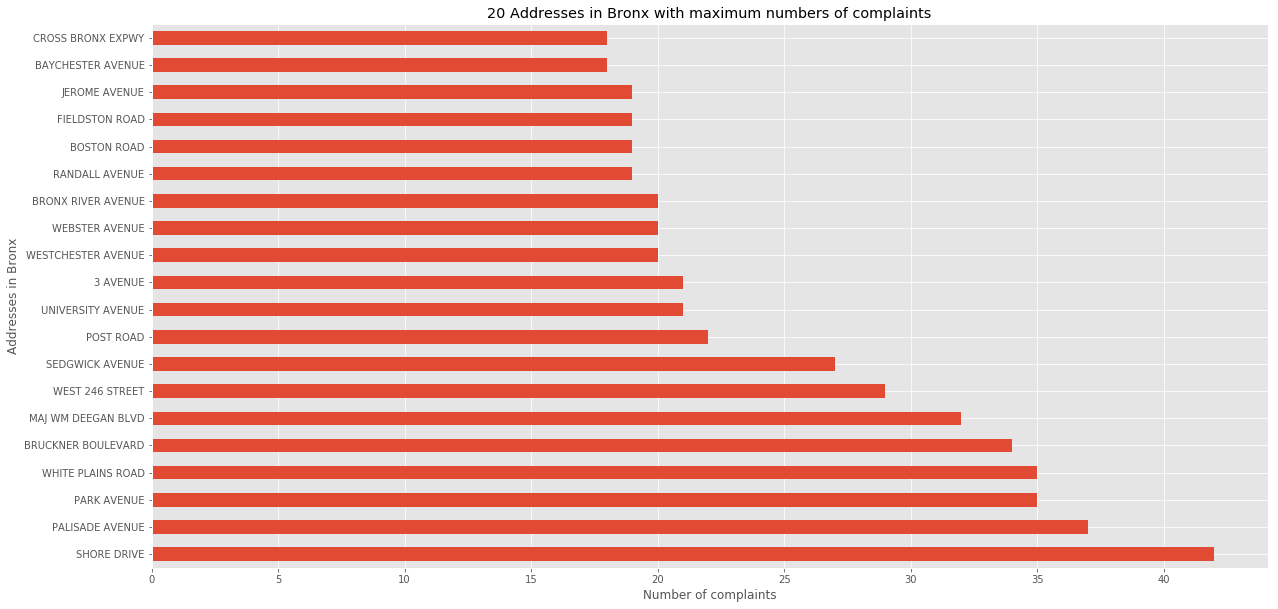

In [25]:
# horizontal bar chart with our top 20 Addresses with maximum number of complaints

a.plot(kind='barh', 
stacked=False,
figsize=(20, 10),  )

plt.title('20 Addresses in Bronx with maximum numbers of complaints')
plt.ylabel('Addresses in Bronx')
plt.xlabel('Number of complaints')

plt.show()

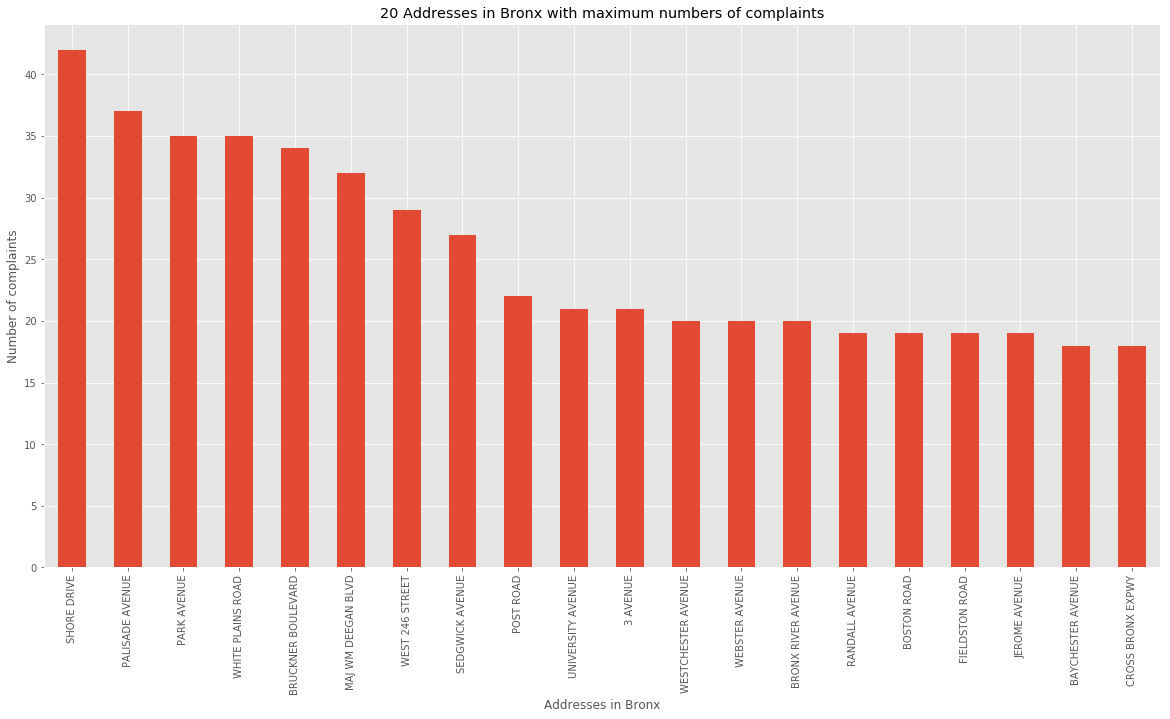

In [26]:
# bar chart with our top 20 Addresses with maximum number of complaints

a.plot(kind='bar', 
stacked=False,
figsize=(20, 10),  )

plt.title('20 Addresses in Bronx with maximum numbers of complaints')
plt.ylabel('Number of complaints')
plt.xlabel('Addresses in Bronx')

plt.show()

In [27]:
# Very interesting information - Many houses in Bronx Built in the beginning of 20th century and in the middle of 20th century

df_last['YearBuilt'].value_counts()

1920    7550
0       6367
1925    6343
1930    5856
1950    5307
1960    4577
1910    3870
1940    3655
1901    3617
1955    3545
1931    3224
1935    2606
1965    2386
1945    1794
1915    1738
1970    1489
1899    1443
1927    1085
1928     986
2006     821
1926     776
2005     746
2004     730
1992     642
2002     631
2007     562
2003     542
2000     541
1905     534
1924     534
        ... 
1977      36
1919      35
1944      27
2017      27
1902      15
1890       6
1896       4
1886       4
1888       4
1891       4
1897       3
1898       3
1889       2
1850       1
1853       1
1893       1
1849       1
1848       1
1868       1
1780       1
1870       1
1878       1
1880       1
1883       1
1884       1
1885       1
1895       1
1887       1
1892       1
1812       1
Name: YearBuilt, Length: 146, dtype: int64

In [28]:
# CONCLUSION

# As we defined there are no significant correlation between various characteristic of the Houses and number of complaints
